<a href="https://colab.research.google.com/github/maincarey/Qiskit/blob/master/AdderQuantumCircuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install qiskit

In [0]:
import numpy as np
from qiskit import *
%matplotlib inline

In [0]:
qiskit.__qiskit_version__

{'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-aqua': '0.6.0',
 'qiskit-ibmq-provider': '0.3.2',
 'qiskit-ignis': '0.2.0',
 'qiskit-terra': '0.9.0'}

In [0]:
# Adder in Quantum Circuits

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute


In [0]:
IBMQ.save_account('b3b9d548888672c0231398d220f168d661b13ecc22537b46beebaf51edcd5c3fad6258b1382c175cbd32269ab68811e6407c891cbaba42d02cc819ad50845310')

In [0]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

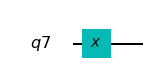

In [0]:
# X Gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians. It maps |0> to |1>、|1> to |0>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q[0])
qc.draw(output='mpl')

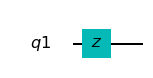

In [0]:
# Z gate rotation around the Z-axis of the Bloch sphere by $\pi$ radians. It is sometimes called a 'phase shift gate'.  |1> to |0>、|0> to |-1>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.z(q[0])
qc.draw(output='mpl')

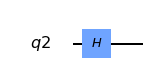

In [0]:
# H gate or Hadmard - 1 / square root 2   - |1> to |1>、|1> to |-1>
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q[0])
qc.draw(output='mpl')

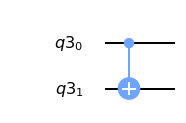

In [0]:
# The controlled NOT gate (or CNOT or CX) acts on 2 qubits, and performs the NOT operation 
# (equivalent to applying an X gate) on the second qubit only when the first qubit is |1>, and otherwise leaves it unchanged.

#  register is pulling 2 qubits here
q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])
qc.draw(output='mpl')

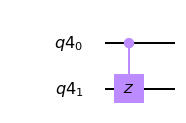

In [0]:
#  The CZ gate acts on two qubits (each called a 'controlled bit' and a 'target bit'). 
# It flips the sign (equivalent to applying the phase shift Z gate) of the target qubit if and only if the control qubit is |1>.

q = QuantumRegister(2)
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])
qc.draw(output='mpl')

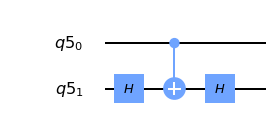

In [0]:
# A CZ gate can also be constructed from a CX gate and H gate
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(q[1])
qc.cx(q[0],q[1])
qc.h(q[1])
qc.draw(output='mpl')

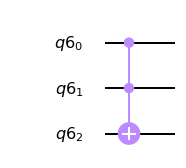

In [0]:
# The CCX gate is also called a Toffoli gate. The CCX gate is a 3-bit gate, with two controls and one target as their input and output. 
# When if the first two bits are in the state |1> it applies a Pauli-X (or NOT) on the third bit, else it does nothing.
q = QuantumRegister(3)
qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])
qc.draw(output='mpl')

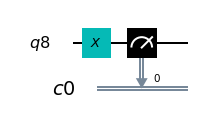

In [0]:
# a X gate can be consider as a NOT gate and measure

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q[0], c[0])
qc.draw(output='mpl')

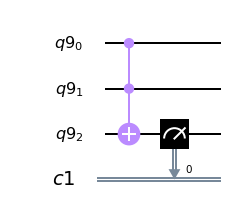

In [0]:
# With a CCX gate, the result of an AND gate for 2 controlled bits will be output to its target bit

q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

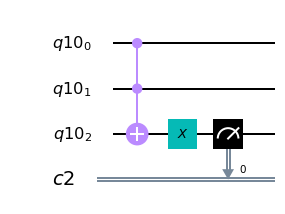

In [0]:
# A NAND gate can be made by applying a NOT gate after applying an AND gate
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

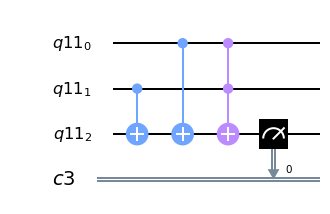

In [0]:
# OR Gate
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

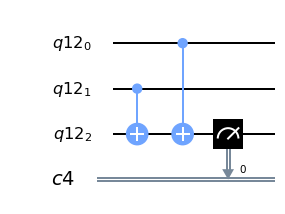

In [0]:
# XOR Gate
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

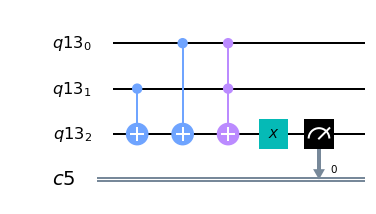

In [0]:
# NOR Gate
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')